# Análisis de comentarios

### Importación de librerías

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

### Importación de datos

In [2]:
commentsDf = pd.read_excel("DataSets/comments_final.xlsx", encoding='latin-1')

In [3]:
commentsDf.head()

id tipo          campus  id_programa   nps                programa  \
0   1  B2B  CSF (Santa Fe)         3483 -50.0  Consultoría de Negocio   
1   2  B2B  CSF (Santa Fe)         3483 -50.0  Consultoría de Negocio   
2   3  B2B  CSF (Santa Fe)         3483 -50.0  Consultoría de Negocio   
3   4  B2B  CSF (Santa Fe)         3483 -50.0  Consultoría de Negocio   
4   5  B2B  CSF (Santa Fe)         3483 -50.0  Consultoría de Negocio   

  id_externo_programa  id_modulo  \
0  csf_c_0901B11353_2      60328   
1  csf_c_0901B11353_2      60328   
2  csf_c_0901B11353_2      60328   
3  csf_c_0901B11353_2      60328   
4  csf_c_0901B11353_2      60328   

                                              modulo  \
0  M16 G1: Mercados Financieros Nacionales e Inte...   
1  M16 G1: Mercados Financieros Nacionales e Inte...   
2  M16 G1: Mercados Financieros Nacionales e Inte...   
3  M16 G1: Mercados Financieros Nacionales e Inte...   
4  M16 G1: Mercados Financieros Nacionales e Inte...   

                  instructor  ... fecha_coordinador fehca_inicio_modulo  \
0  Gerardo  Salazar  Viezca   ...       SIN_ASIGNAR          2018-05-11   
1  Gerardo  Salazar  Viezca   ...       SIN_ASIGNAR          2018-05-11   
2  Gerardo  Salazar  Viezca   ...       SIN_ASIGNAR          2018-05-11   
3  Gerardo  Salazar  Viezca   ...       SIN_ASIGNAR          2018-05-11   
4  Gerardo  Salazar  Viezca   ...       SIN_ASIGNAR          2018-05-11   

  fecha_fin_modulo                             indicador codigo_indicador  \
0       2018-06-01  Retroalimentación para el Instructor           CAINST   
1       2018-06-01  Retroalimentación para el Instructor           CAINST   
2       2018-06-01  Retroalimentación para el Instructor           CAINST   
3       2018-06-01  Retroalimentación para el Instructor           CAINST   
4       2018-06-01  Retroalimentación para el Instructor           CAINST   

                                          comentario puntaje_sentimiento  \
0  Que su curso lo haga mas dinámico, tiene una v...               -0.12   
1  El instructuor es muy bueno, conoce muy bien l...                0.46   
2  Todo estuvo bien. Me gustarían ejercicios prác...                0.10   
3  La clase estuvo excelente, pero sería major si...                0.30   
4         Actividades más dinámicas durante el curso                0.22   

  sentimiento   categoria                      subcategoria  
0    Negativo  Instructor            Dinamismo y Ejercicios  
1    Positivo  Instructor            Habilidad de Enseñanza  
2     Neutral  Instructor            Dinamismo y Ejercicios  
3    Positivo    Programa  Diseño y Estructura (Coherencia)  
4    Positivo  Instructor            Dinamismo y Ejercicios  

[5 rows x 24 columns]

In [114]:
commentsDf.columns

Index(['id', 'tipo', 'campus', 'id_programa', 'nps', 'programa',
       'id_externo_programa', 'id_modulo', 'modulo', 'instructor',
       'correo_instructor', 'fecha_instructor', 'nombre_coordinador',
       'correo_coordinador', 'fecha_coordinador', 'fehca_inicio_modulo',
       'fecha_fin_modulo', 'indicador', 'codigo_indicador', 'comentario',
       'puntaje_sentimiento', 'sentimiento', 'categoria', 'subcategoria'],
      dtype='object')

## Estadística básica de los campos numéricos

In [4]:
commentsDf.describe()

id    id_programa           nps      id_modulo  \
count  103340.000000  103340.000000  96911.000000  103340.000000   
mean    51670.500000    6824.553571     78.240378  106506.502448   
std     29831.832746    1025.533763     26.176684   14106.696160   
min         1.000000    3483.000000   -100.000000   60328.000000   
25%     25835.750000    6461.000000     71.000000   95739.000000   
50%     51670.500000    6906.000000     85.000000  106167.000000   
75%     77505.250000    7348.000000     96.000000  116287.000000   
max    103340.000000    9464.000000    100.000000  142644.000000   

       puntaje_sentimiento  
count        103340.000000  
mean              0.176779  
std               0.282044  
min              -1.500000  
25%               0.000000  
50%               0.160000  
75%               0.370000  
max               1.500000

## Número de registros por campus

In [5]:
commentsDf.groupby('campus').size().sort_values(ascending=False).to_frame()

0
campus                             
CSF (Santa Fe)                25033
MTY (Monterrey)               11120
CCM (Ciudad de México)        10517
CEM (Estado de México)         9812
GDL (Guadalajara)              7843
QRO (Querétaro)                6675
PUE (Puebla)                   6353
ECU(Ecuador)                   3273
SLP (San Luis Potosí)          2303
SAL (Saltillo)                 2078
TOL (Toluca)                   2021
LEO (León)                     1742
MER (Mérida)                   1737
AGS (Aguascalientes)           1645
SIN (Sinaloa)                  1526
CDJ (Cd. Juárez)               1381
HER (Sonora Norte)             1356
CHI (Chihuahua)                1167
Tec Extension                  1115
MRL (Morelia)                   992
TAM (Tampico)                   611
LAG (Laguna)                    533
HGO (Hidalgo)                   351
CCV (Central de Veracruz)       321
ZAC (Zacatecas)                 299
CVA (Cuernavaca)                260
Campus para realizar pruebas    204
COB (Obregón)                   185
HDO                             175
VLL                             161
Sede Campeche (CAMP)            161
Sede España                     111
Campus Central(CC)               95
IRA (Irapuato)                   90
COL(Colombia)                    60
PRU(Perú)                        29
Campus Demo                       5

## Distribución del NPS

In [6]:
commentsDf['nps'].hist()

## Distribución del puntaje de sentimiento

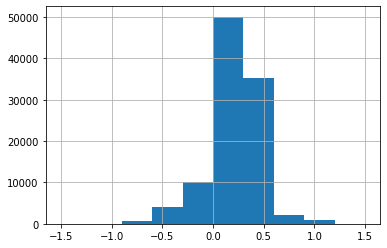

In [7]:
commentsDf['puntaje_sentimiento'].hist()

## Scatter plot de NPS vs. Puntaje de sentimiento

In [8]:
x1 = commentsDf['nps']
y1 = commentsDf['puntaje_sentimiento']
plt.scatter(x1,y1)
plt.show()

### Específicamente en campus Monterrey

In [9]:
puntajeMty = commentsDf[commentsDf.campus == 'MTY (Monterrey)']['puntaje_sentimiento'].to_frame()
npsMty = commentsDf[commentsDf.campus == 'MTY (Monterrey)']['nps'].to_frame()

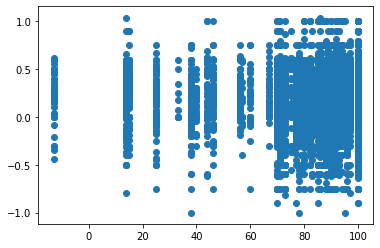

In [10]:
x = npsMty
y = puntajeMty
plt.scatter(x,y)
plt.show()

### Cálculo de cuántos registros hay con NPS positivo y cuántos con NPS negativo para cada campus.

In [11]:
#Distinct campuses
campuses = commentsDf.campus.unique()

In [25]:
promotorsNum = []
detractorsNum = []

for campus in campuses:
    promotors = commentsDf[(commentsDf.campus == campus) & (commentsDf.nps > 0)]
    detractors = commentsDf[(commentsDf.campus == campus) & (commentsDf.nps < 0)]
    numPromotors = promotors['id_programa'].count()
    numDetractors = detractors['id_programa'].count()
    promotorsNum.append(numPromotors)
    detractorsNum.append(numDetractors)

print('Cantidad de NPSs positivos \n' + str(promotorsNum))
print('\n Cantidad de NPSs negativos \n' + str(detractorsNum))


Cantidad de NPSs positivos 
[23226, 9844, 1830, 9098, 594, 1984, 6735, 2218, 306, 1548, 101, 5906, 5977, 9366, 1341, 1207, 1665, 1644, 1144, 964, 29, 511, 1493, 3273, 185, 770, 141, 321, 254, 161, 0, 299, 111, 175, 90, 60, 0]

 Cantidad de NPSs negativos 
[667, 291, 0, 394, 0, 23, 151, 0, 0, 0, 0, 261, 198, 48, 0, 0, 0, 0, 0, 6, 0, 0, 16, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## NPS positivo vs. NPS negativo

In [26]:
promotorsDf = pd.DataFrame()
promotorsDf['campus'] = campuses
promotorsDf['positive_NPS'] = promotorsNum
promotorsDf['negative_NPS'] = detractorsNum
promotorsDf

campus  positive_NPS  negative_NPS
0                 CSF (Santa Fe)         23226           667
1         CCM (Ciudad de México)          9844           291
2                 SAL (Saltillo)          1830             0
3         CEM (Estado de México)          9098           394
4                  TAM (Tampico)           594             0
5                   TOL (Toluca)          1984            23
6              GDL (Guadalajara)          6735           151
7          SLP (San Luis Potosí)          2218             0
8                  HGO (Hidalgo)           306             0
9           AGS (Aguascalientes)          1548             0
10          Sede Campeche (CAMP)           101             0
11               QRO (Querétaro)          5906           261
12                  PUE (Puebla)          5977           198
13               MTY (Monterrey)          9366            48
14              CDJ (Cd. Juárez)          1341             0
15            HER (Sonora Norte)          1207             0
16                  MER (Mérida)          1665             0
17                    LEO (León)          1644             0
18               CHI (Chihuahua)          1144             0
19                 MRL (Morelia)           964             6
20                     PRU(Perú)            29             0
21                  LAG (Laguna)           511             0
22                 SIN (Sinaloa)          1493            16
23                  ECU(Ecuador)          3273             0
24                 COB (Obregón)           185             0
25                 Tec Extension           770             0
26  Campus para realizar pruebas           141             7
27     CCV (Central de Veracruz)           321             0
28              CVA (Cuernavaca)           254             0
29                           VLL           161             0
30                   Campus Demo             0             0
31               ZAC (Zacatecas)           299             0
32                   Sede España           111             0
33                           HDO           175             0
34                IRA (Irapuato)            90             0
35                 COL(Colombia)            60             0
36            Campus Central(CC)             0             0

## Tipo de sentimiento

### ¿Qué tipo de sentimiento predomina?

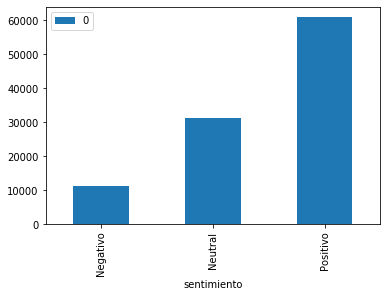

In [18]:
commentsDf.groupby('sentimiento').size().to_frame().plot.bar()

## Análisis de los programas/cursos

### Total de programas/cursos

In [69]:
commentsDf[['id_programa']].drop_duplicates().shape

(1144, 1)

### Programas/cursos con NPS menor a 75

In [77]:
negativeNPS = commentsDf[commentsDf.nps < 75]['id_programa'].drop_duplicates().count()
# TOP 10 "Peores cursos"
commentsDf[commentsDf.nps < 75][['id_programa','programa','nps']].drop_duplicates().sort_values('nps').head(10)

id_programa                                           programa    nps
95518         8297               Diplomado en  Carrera Corporativa G1 -100.0
84154         7674  Gestión de Proyectos. Preparación para el exam... -100.0
82339         7606                                   evaluador prog 2 -100.0
57857         7011  Certificación Internacional en Coaching Ejecut... -100.0
84698         7706                                         Programa 3 -100.0
41290         6753     Administración Estratégica de Recursos Humanos  -83.0
61907         7065              Certificación en Six Sigma Green Belt  -75.0
99211         8687  Certificación Internacional en Gestión Ágil de...  -71.0
44518         6800     Desarrollo Organizacional y Gestión del Cambio  -57.0
98429         8664                                         e-Commerce  -57.0

### ¿Qué instructores imparten esos cursos?

In [178]:
commentsDf[commentsDf.nps < 75][['id_programa','programa','nps','instructor']].drop_duplicates('id_programa').sort_values('nps').head(10)

id_programa                                           programa    nps  \
95518         8297               Diplomado en  Carrera Corporativa G1 -100.0   
84154         7674  Gestión de Proyectos. Preparación para el exam... -100.0   
82339         7606                                   evaluador prog 2 -100.0   
57857         7011  Certificación Internacional en Coaching Ejecut... -100.0   
84698         7706                                         Programa 3 -100.0   
41290         6753     Administración Estratégica de Recursos Humanos  -83.0   
61907         7065              Certificación en Six Sigma Green Belt  -75.0   
99211         8687  Certificación Internacional en Gestión Ágil de...  -71.0   
44518         6800     Desarrollo Organizacional y Gestión del Cambio  -57.0   
98429         8664                                         e-Commerce  -57.0   

                            instructor  
95518          Carlos   Suárez Álvarez  
84154             Guillermo  Haaz Díaz  
82339            Instructor de Prueba   
57857  Juan Carlos Bonilla  Bustamante  
84698        Instructor No Disponible   
41290       Juan Alberto Corona Medina  
61907          Froylan  Franco Herrera  
99211           Martín  Sierra Mercado  
44518     Carlos Gustavo Ortiz Vancini  
98429      Egdar  Fabiel Sánchez  Díaz

### Programas/cursos con NPS mayor a 75

In [79]:
positiveNPS = commentsDf[commentsDf.nps > 75]['id_programa'].drop_duplicates().count()
# TOP 10 "Mejores cursos"
commentsDf[commentsDf.nps > 75][['id_programa','programa','nps']].drop_duplicates().sort_values('nps', ascending = False).head(10)

id_programa                                           programa    nps
90            4400                          Liderazgo Tranformacional  100.0
83882         7670                     My leadership journey (Tol G8)  100.0
85204         7721          Gestión de la Administración de Proyectos  100.0
84942         7716                          Administración Financiera  100.0
84708         7710   DIPLOMADO EN EMPRENDIMIENTO Y GESTION DE EVENTOS  100.0
84706         7708                                         Programa 4  100.0
84702         7707                                         Programa 2  100.0
84695         7705                                         Programa 1  100.0
84606         7703         Certificación en Lean Six Sigma Black Belt  100.0
84549         7702  Sistemas Estratégicos de Compensaciones y Bene...  100.0

### ¿Qué instructores imparten esos cursos?

In [117]:
commentsDf[commentsDf.nps > 75][['id_programa','programa','nps','instructor']].drop_duplicates().sort_values('nps', ascending = False).head(10)

id_programa                                           programa    nps  \
90            4400                          Liderazgo Tranformacional  100.0   
77765         7385              Diplomado Formación Gerentes Posventa  100.0   
77556         7383                    Dirección Estratégica de Ventas  100.0   
77538         7383                    Dirección Estratégica de Ventas  100.0   
77528         7383                    Dirección Estratégica de Ventas  100.0   
77507         7383                    Dirección Estratégica de Ventas  100.0   
77479         7383                    Dirección Estratégica de Ventas  100.0   
77454         7383                    Dirección Estratégica de Ventas  100.0   
77300         7377  Administración Efectiva del Crédito y la Cobranza  100.0   
77278         7376         Desarrollo de Supervisores que Transforman  100.0   

                         instructor  
90        Armando  Villa  Hernández  
77765  Juan Carlos Fajardo Espinosa  
77556     Miguel Angel López Lomelí  
77538           Alejandro  Romero .  
77528     Daniel  Forcada Anguiano   
77507         Enrique  Ruiz  Dewett  
77479   José Luis Ronquillo Horsten  
77454   Fernando  González Figueroa  
77300          Rocío  Andrade  Lara  
77278    María  José  Martí  Pérez

### Programas/cursos que no tienen información del NPS

In [80]:
nullNPS = commentsDf[commentsDf.nps.isnull()]['id_programa'].drop_duplicates().count()
print(nullNPS)

164


### Cursos vs. NPS

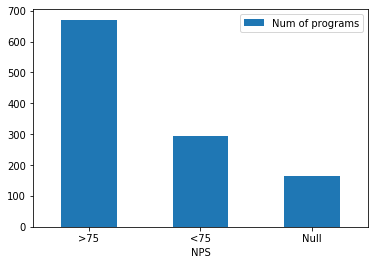

In [68]:
programNPS = pd.DataFrame({'NPS':['>75', '<75', 'Null'], 'Num of programs':[positiveNPS, negativeNPS, nullNPS]})
ax = programNPS.plot.bar(x='NPS', y='Num of programs', rot=0)

### Porcentaje de cursos en cada categoría de NPS

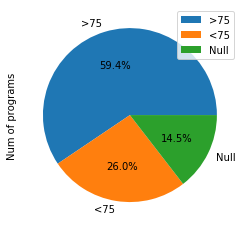

In [121]:
programNPS.plot.pie(y='Num of programs', labels = programNPS.NPS, autopct='%.1f%%')

## Análisis de los campus

### TOP 10 de los campus que tienen mayor cantidad de programas/cursos con NPS < 75

In [109]:

topMinor = commentsDf[commentsDf.nps < 75].drop_duplicates('id_programa').groupby('campus').size().sort_values(ascending = False).to_frame().head(10)
topMinor

0
campus                          
CSF (Santa Fe)                63
CCM (Ciudad de México)        44
CEM (Estado de México)        33
MTY (Monterrey)               24
QRO (Querétaro)               22
PUE (Puebla)                  21
GDL (Guadalajara)             19
ECU(Ecuador)                  10
SLP (San Luis Potosí)          7
Campus para realizar pruebas   6

In [110]:
topMinor.sort_values(0,ascending = True).plot.barh()

## Análisis por fecha

### Se agrega la columna de año (separándolo de la fecha completa)

In [151]:
commentsDf['start_year'] = pd.DatetimeIndex(commentsDf['fecha_inicio_modulo']).year
commentsDf.head()


id tipo          campus  id_programa   nps                programa  \
0   1  B2B  CSF (Santa Fe)         3483 -50.0  Consultoría de Negocio   
1   2  B2B  CSF (Santa Fe)         3483 -50.0  Consultoría de Negocio   
2   3  B2B  CSF (Santa Fe)         3483 -50.0  Consultoría de Negocio   
3   4  B2B  CSF (Santa Fe)         3483 -50.0  Consultoría de Negocio   
4   5  B2B  CSF (Santa Fe)         3483 -50.0  Consultoría de Negocio   

  id_externo_programa  id_modulo  \
0  csf_c_0901B11353_2      60328   
1  csf_c_0901B11353_2      60328   
2  csf_c_0901B11353_2      60328   
3  csf_c_0901B11353_2      60328   
4  csf_c_0901B11353_2      60328   

                                              modulo  \
0  M16 G1: Mercados Financieros Nacionales e Inte...   
1  M16 G1: Mercados Financieros Nacionales e Inte...   
2  M16 G1: Mercados Financieros Nacionales e Inte...   
3  M16 G1: Mercados Financieros Nacionales e Inte...   
4  M16 G1: Mercados Financieros Nacionales e Inte...   

                  instructor  ... fecha_inicio_modulo fecha_fin_modulo  \
0  Gerardo  Salazar  Viezca   ...          2018-05-11       2018-06-01   
1  Gerardo  Salazar  Viezca   ...          2018-05-11       2018-06-01   
2  Gerardo  Salazar  Viezca   ...          2018-05-11       2018-06-01   
3  Gerardo  Salazar  Viezca   ...          2018-05-11       2018-06-01   
4  Gerardo  Salazar  Viezca   ...          2018-05-11       2018-06-01   

                              indicador codigo_indicador  \
0  Retroalimentación para el Instructor           CAINST   
1  Retroalimentación para el Instructor           CAINST   
2  Retroalimentación para el Instructor           CAINST   
3  Retroalimentación para el Instructor           CAINST   
4  Retroalimentación para el Instructor           CAINST   

                                          comentario puntaje_sentimiento  \
0  Que su curso lo haga mas dinámico, tiene una v...               -0.12   
1  El instructuor es muy bueno, conoce muy bien l...                0.46   
2  Todo estuvo bien. Me gustarían ejercicios prác...                0.10   
3  La clase estuvo excelente, pero sería major si...                0.30   
4         Actividades más dinámicas durante el curso                0.22   

  sentimiento   categoria                      subcategoria start_year  
0    Negativo  Instructor            Dinamismo y Ejercicios       2018  
1    Positivo  Instructor            Habilidad de Enseñanza       2018  
2     Neutral  Instructor            Dinamismo y Ejercicios       2018  
3    Positivo    Programa  Diseño y Estructura (Coherencia)       2018  
4    Positivo  Instructor            Dinamismo y Ejercicios       2018  

[5 rows x 25 columns]

### NPS a través de los años

In [158]:
meansByYear = commentsDf.groupby('start_year').mean()
meansByYear

id  id_programa        nps      id_modulo  \
start_year                                                        
2017         7984.283293  5250.883777  74.994382   84239.399516   
2018        48018.326879  6693.055728  77.921259  104580.648932   
2019        91587.186684  8261.802035  81.690535  127520.113470   

            puntaje_sentimiento  
start_year                       
2017                   0.177869  
2018                   0.174778  
2019                   0.197508

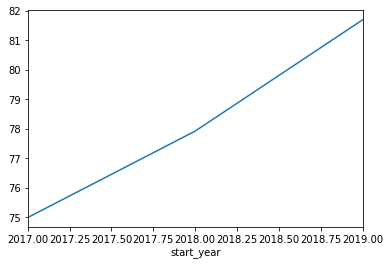

In [176]:
meansByYear['nps'].plot.line()

### Si mostramos el año de los cursos peor evaluados  vemos que todos pertenecen al 2018

In [179]:
commentsDf[commentsDf.nps < 75][['id_programa','programa','nps','instructor','start_year']].drop_duplicates('id_programa').sort_values('nps').head(10)

id_programa                                           programa    nps  \
95518         8297               Diplomado en  Carrera Corporativa G1 -100.0   
84154         7674  Gestión de Proyectos. Preparación para el exam... -100.0   
82339         7606                                   evaluador prog 2 -100.0   
57857         7011  Certificación Internacional en Coaching Ejecut... -100.0   
84698         7706                                         Programa 3 -100.0   
41290         6753     Administración Estratégica de Recursos Humanos  -83.0   
61907         7065              Certificación en Six Sigma Green Belt  -75.0   
99211         8687  Certificación Internacional en Gestión Ágil de...  -71.0   
44518         6800     Desarrollo Organizacional y Gestión del Cambio  -57.0   
98429         8664                                         e-Commerce  -57.0   

                            instructor  start_year  
95518          Carlos   Suárez Álvarez        2018  
84154             Guillermo  Haaz Díaz        2018  
82339            Instructor de Prueba         2018  
57857  Juan Carlos Bonilla  Bustamante        2018  
84698        Instructor No Disponible         2018  
41290       Juan Alberto Corona Medina        2018  
61907          Froylan  Franco Herrera        2018  
99211           Martín  Sierra Mercado        2018  
44518     Carlos Gustavo Ortiz Vancini        2018  
98429      Egdar  Fabiel Sánchez  Díaz        2018